In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')
# sns.set_style('whitegrid')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
sns.set_style('whitegrid')
test_data.head()
#兄弟姐妹/配偶的数量“SibSp”、父母/孩子的数量“Parch”

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data.info()
print("-" * 40)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

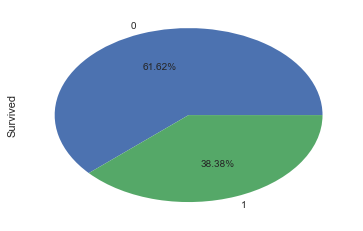

In [7]:
train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')#取两位小数

In [8]:
#缺两值，可用众数填充
train_data['Embarked'][train_data.Embarked.isnull()] = train_data.Embarked.dropna().mode().values#dropna()删除缺失数据，mode()众数

In [9]:
#replace missing value with U0
train_data['Cabin'] = train_data.Cabin.fillna('U0')
train_data.loc[train_data.Sex == 'male','Sex'] = 0
train_data.loc[train_data.Sex == 'female','Sex'] = 1
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U0,S


In [10]:
from sklearn.ensemble import RandomForestRegressor
#choose training data to predict age
age_df = train_data[['Age','Survived','Fare', 'Parch', 'SibSp', 'Pclass','Sex']]
age_df_notnull = age_df.loc[(train_data.Age.notnull())]
age_df_isnull = age_df.loc[(train_data.Age.isnull())]
X = age_df_notnull.values[:,1:]#要加.values()
Y = age_df_notnull.values[:,0]

RFR = RandomForestRegressor(n_estimators = 1000,n_jobs = -1)
RFR.fit(X,Y)
predictage = RFR.predict(age_df_isnull.values[:,1:])
train_data.loc[train_data.Age.isnull(),'Age'] = predictage
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
#数据之间的联系
train_data.groupby(['Sex','Survived'])['Survived'].count()
#print(train_data.groupby(['Sex','Survived']))

Sex  Survived
0    0           468
     1           109
1    0            81
     1           233
Name: Survived, dtype: int64

,Survived
Sex,
0,577
1,314


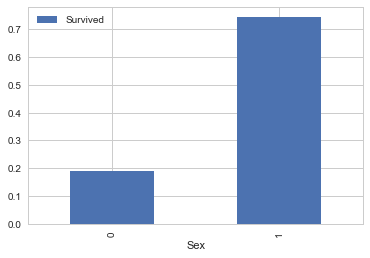

In [12]:
train_data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
train_data[['Sex','Survived']].groupby(['Sex']).count()

In [13]:
train_data.groupby(['Pclass','Survived'])['Pclass'].count()

#train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()


Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Pclass, dtype: int64

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


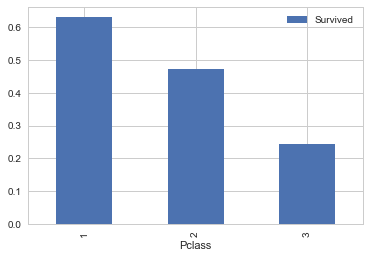

In [14]:
train_data[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()#三个船舱存活者所占的比例 1表示活着
train_data[['Pclass','Survived']].groupby(['Pclass']).mean()

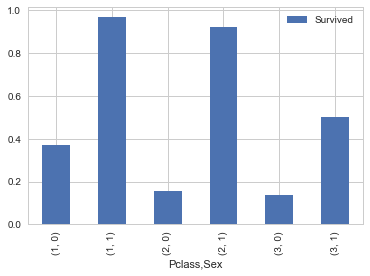

In [15]:
#将船舱等级和性别联系起来的存活率
train_data[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean().plot.bar()


In [16]:
train_data.groupby(['Sex', 'Pclass', 'Survived'])['Survived'].count()


Sex  Pclass  Survived
0    1       0            77
             1            45
     2       0            91
             1            17
     3       0           300
             1            47
1    1       0             3
             1            91
     2       0             6
             1            70
     3       0            72
             1            72
Name: Survived, dtype: int64

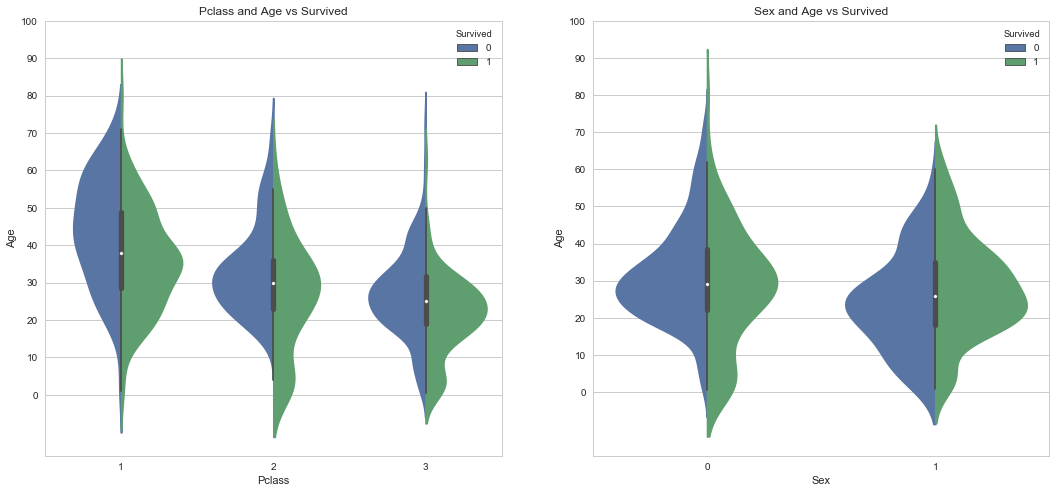

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot("Pclass", "Age", hue="Survived", data=train_data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", "Age", hue="Survived", data=train_data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

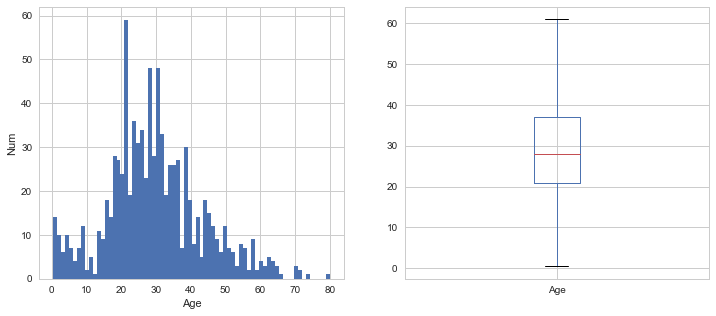

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(121)
train_data['Age'].hist(bins=70)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
train_data.boxplot(column='Age', showfliers=False)#查看数据分布情况
plt.show()

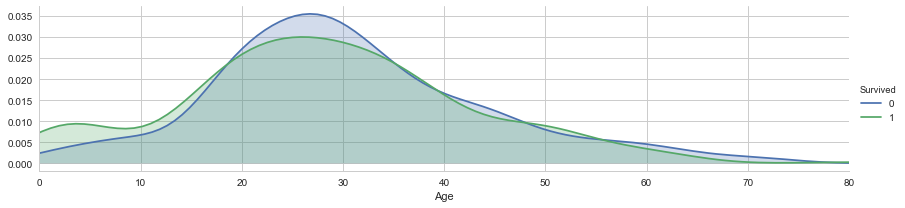

In [19]:
#不同年龄下的生存和非生存的分布情况
facet = sns.FacetGrid(train_data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()

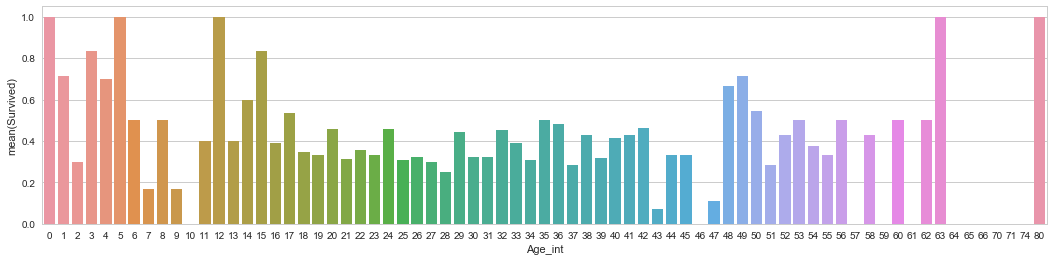

In [20]:
# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
train_data["Age_int"] = train_data["Age"].astype(int)
average_age = train_data[["Age_int", "Survived"]].groupby(['Age_int'],as_index=False).mean()
sns.barplot(x='Age_int', y='Survived', data=average_age)

In [21]:
train_data['Age'].describe()


count    891.000000
mean      29.638132
std       13.775371
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

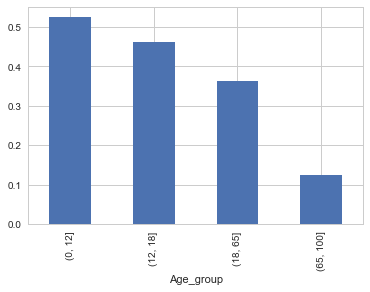

In [22]:
#按照年龄，将乘客划分为儿童、少年、成年和老年，分析四个群体的生还情况
bins = [0,12,18,65,100]
train_data['Age_group'] = pd.cut(train_data['Age'], bins)
by_age = train_data.groupby('Age_group')['Survived'].mean()
by_age.plot(kind = 'bar')

In [23]:
#称谓与存活的关系
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.',expand = False)#找.前面的英文
pd.crosstab(train_data['Title'],train_data['Sex'])

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


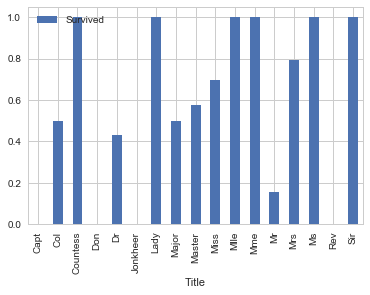

In [24]:
train_data[['Title','Survived']].groupby(['Title']).mean().plot.bar()

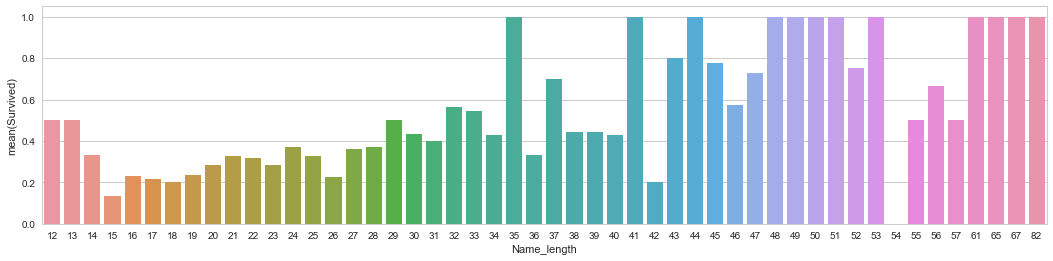

In [25]:
#观察名字长度和生存率之间存在关系的可能
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
train_data['Name_length'] = train_data['Name'].apply(len)
name_length = train_data[['Name_length','Survived']].groupby(['Name_length'],as_index=False).mean()
sns.barplot(x='Name_length', y='Survived', data=name_length)

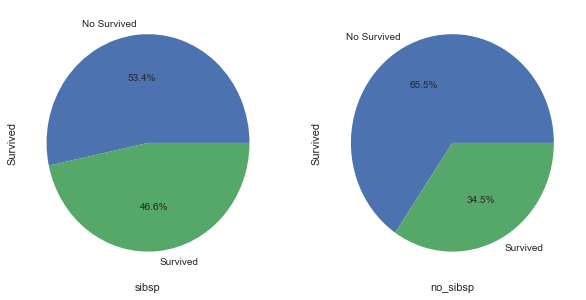

In [26]:
# 将数据分为有兄弟姐妹的和没有兄弟姐妹的两组：
sibsp_df = train_data[train_data['SibSp'] != 0]
no_sibsp_df = train_data[train_data['SibSp'] == 0]

plt.figure(figsize=(10,5))
plt.subplot(121)
sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('sibsp')

plt.subplot(122)
no_sibsp_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('no_sibsp')

plt.show()

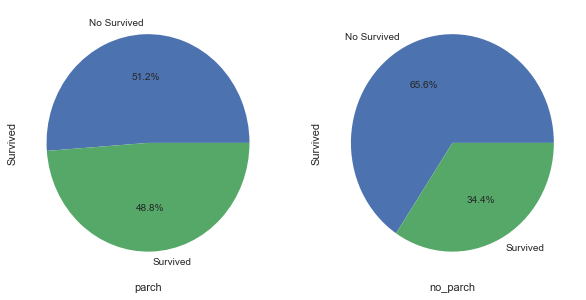

In [27]:
#有无父母子女和存活与否的关系 Parch
parch_df = train_data[train_data['Parch'] != 0]
no_parch_df = train_data[train_data['Parch'] == 0]

plt.figure(figsize=(10,5))
plt.subplot(121)
parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('parch')

plt.subplot(122)
no_parch_df['Survived'].value_counts().plot.pie(labels=['No Survived', 'Survived'], autopct = '%1.1f%%')
plt.xlabel('no_parch')

plt.show()

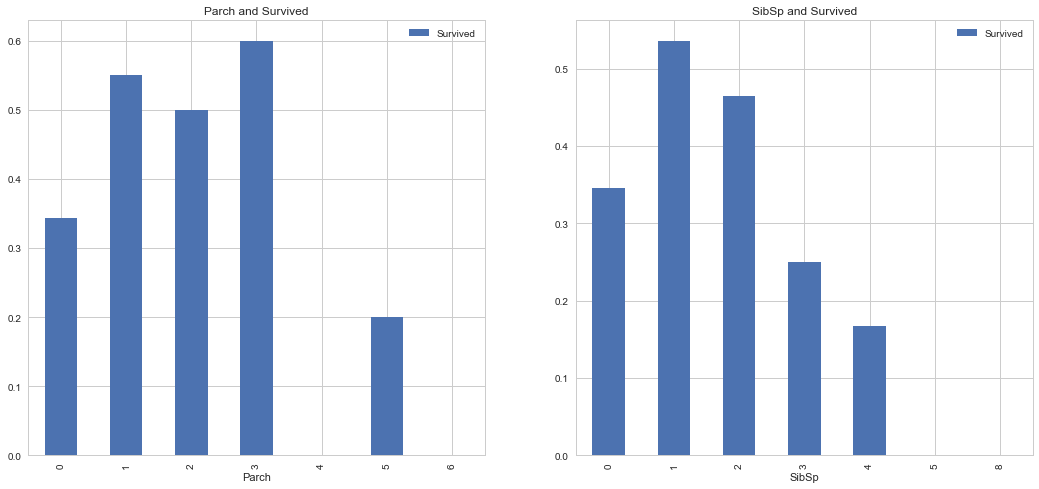

In [28]:
#亲友的人数和存活与否的关系 SibSp & Parch
fig,ax=plt.subplots(1,2,figsize=(18,8))
train_data[['Parch','Survived']].groupby(['Parch']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Parch and Survived')
train_data[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar(ax=ax[1])
ax[1].set_title('SibSp and Survived')

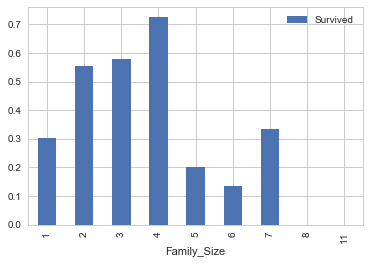

In [29]:
train_data['Family_Size'] = train_data['Parch'] + train_data['SibSp'] + 1
train_data[['Family_Size','Survived']].groupby(['Family_Size']).mean().plot.bar()

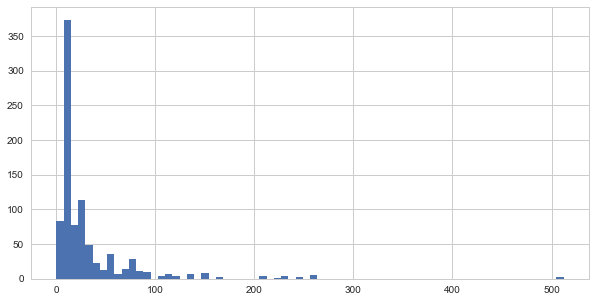

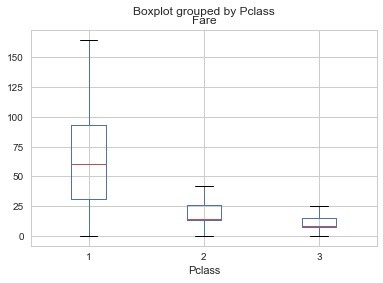

In [30]:
#票价分布和存活与否的关系  Fare
plt.figure(figsize=(10,5))
train_data['Fare'].hist(bins = 70)

train_data.boxplot(column='Fare', by='Pclass', showfliers=False)
plt.show()

In [31]:
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

,0
0,22.117887
1,48.395408


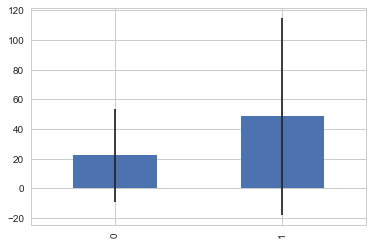

In [32]:
fare_not_survived = train_data['Fare'][train_data['Survived'] == 0]
fare_survived = train_data['Fare'][train_data['Survived'] == 1]

average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])
average_fare.plot(yerr=std_fare, kind='bar', legend=False)

average_fare.head()
#plt.show()
#生还者的平均票价要大于未生还者的平均票价

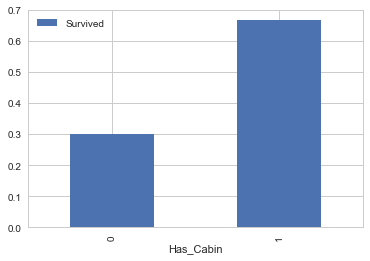

In [33]:
#简单地将数据分为是否有Cabin记录作为特征，与生存与否进行分析
# Replace missing values with "U0"
train_data.loc[train_data.Cabin.isnull(), 'Cabin'] = 'U0'
train_data['Has_Cabin'] = train_data['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)
train_data[['Has_Cabin','Survived']].groupby(['Has_Cabin']).mean().plot.bar()

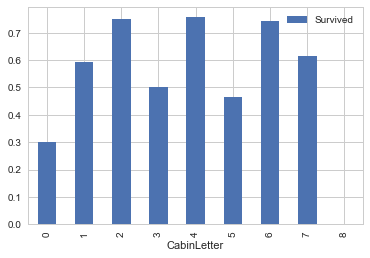

In [34]:
# create feature for the alphabetical part of the cabin number
train_data['CabinLetter'] = train_data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())#选取开头的字母
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0] #将特征种类数字化处理
train_data['CabinLetter']
train_data[['CabinLetter','Survived']].groupby(['CabinLetter']).mean().plot.bar()

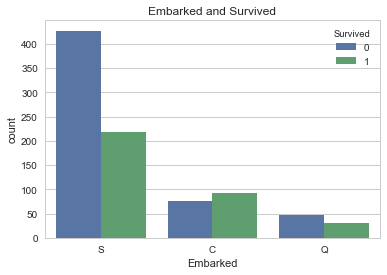

In [35]:
sns.countplot('Embarked', hue='Survived', data=train_data)
plt.title('Embarked and Survived')

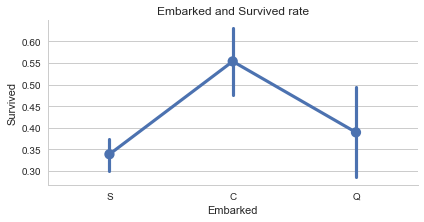

In [36]:
sns.factorplot('Embarked', 'Survived', data=train_data, size=3, aspect=2)
plt.title('Embarked and Survived rate')
plt.show()

In [37]:
#qualitative variable是一些频繁出现的几个独立变量时，Dummy Variables比较适合使用
embark_dummies = pd.get_dummies(train_data['Embarked'])
train_data = train_data.join(embark_dummies)
train_data.drop(['Embarked'],axis=1,inplace=True)

embark_dummies = train_data[['S','C','Q']]
embark_dummies.head()

,S,C,Q
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [44]:
# Replace missing values with "U0"
train_data['Cabin'][train_data.Cabin.isnull()] = 'U0'
# create feature for the alphabetical part of the cabin number
train_data['CabinLetter'] = train_data['Cabin'].map( lambda x : re.compile("([a-zA-Z]+)").search(x).group())#同一字母开头的都是一类
# convert the distinct cabin letters with incremental integer values
train_data['CabinLetter'] = pd.factorize(train_data['CabinLetter'])[0]

train_data['CabinLetter'][0:7]
#train_data['Cabin'].head()

0    0
1    1
2    0
3    1
4    0
5    0
6    2
Name: CabinLetter, dtype: int64

In [45]:
#对Age进行Scaling
from sklearn import preprocessing

assert np.size(train_data['Age']) == 891
# StandardScaler will subtract the mean from each value then scale to the unit variance
scaler = preprocessing.StandardScaler()
train_data['Age_scaled'] = scaler.fit_transform(train_data['Age'].values.reshape(-1, 1))
train_data['Age_scaled'].head()

0   -0.554789
1    0.607357
2   -0.264252
3    0.389454
4    0.389454
Name: Age_scaled, dtype: float64

In [47]:
train_data['Fare_bin'] = pd.qcut(train_data['Fare'],5)#bin将数据分为5个部分
train_data['Fare_bin'].head()

0      (-0.001, 7.854]
1    (39.688, 512.329]
2        (7.854, 10.5]
3    (39.688, 512.329]
4        (7.854, 10.5]
Name: Fare_bin, dtype: category
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [48]:
# factorize
train_data['Fare_bin_id'] = pd.factorize(train_data['Fare_bin'])[0]

# dummies
# fare_bin_dummies_df = pd.get_dummies(train_data['Fare_bin']).rename(columns=lambda x: 'Fare_' + str(x))
# train_data = pd.concat([train_data, fare_bin_dummies_df], axis=1)

In [2]:
train_df_org = pd.read_csv('data/train.csv')
test_df_org = pd.read_csv('data/test.csv')
test_df_org['Survived'] = 0
combined_train_test = train_df_org.append(test_df_org)
PassengerId = test_df_org['PassengerId']
combined_train_test.head()
combined_train_test[-5:-1]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.05,"Spector, Mr. Woolf",0,1305,3,male,0,0,A.5. 3236
414,39.0,C105,C,108.90,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,0,PC 17758
415,38.5,NaN,S,7.25,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,0,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.05,"Ware, Mr. Frederick",0,1308,3,male,0,0,359309


In [3]:
#特征工程 
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [4]:
#Embarked缺失值不多，取重数
combined_train_test['Embarked'].fillna(combined_train_test['Embarked'].mode().iloc[0],inplace=True)
combined_train_test['Embarked'].mode().iloc[0] #取第一行的数据

'S'

In [5]:
# 为了后面的特征分析，这里我们将 Embarked 特征进行facrorizing
combined_train_test['Embarked'] = pd.factorize(combined_train_test['Embarked'])[0]


#使用dummy进行处理
emb_dummies_df = pd.get_dummies(combined_train_test['Embarked'], prefix=combined_train_test[['Embarked']].columns[0])
combined_train_test[['Embarked']].columns[0]
combined_train_test = pd.concat([combined_train_test,emb_dummies_df],axis = 1)

combined_train_test.head()




,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_0,Embarked_1,Embarked_2
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171,1,0,0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599,0,1,0
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282,1,0,0
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803,1,0,0
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450,1,0,0


In [6]:
# 对sex进行one-hot编码
# 为了后面的特征分析，这里我们也将 Sex 特征进行facrorizing
combined_train_test['Sex'] = pd.factorize(combined_train_test['Sex'])[0]

sex_dummies_df = pd.get_dummies(combined_train_test['Sex'], prefix=combined_train_test[['Sex']].columns[0])
combined_train_test = pd.concat([combined_train_test, sex_dummies_df], axis=1)
combined_train_test.head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0,A/5 21171,1,0,0,1,0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1,PC 17599,0,1,0,0,1
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1,STON/O2. 3101282,1,0,0,0,1
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1,113803,1,0,0,0,1
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0,373450,1,0,0,1,0


In [7]:
#处理Name
combined_train_test['Title'] = combined_train_test['Name'].map(lambda x: re.compile(", (.*?)\.").findall(x)[0])
title_Dict = {}
title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))
print(title_Dict)

combined_train_test['Title'] = combined_train_test['Title'].map(title_Dict)
combined_train_test.head()

{'Capt': 'Officer', 'Col': 'Officer', 'Major': 'Officer', 'Dr': 'Officer', 'Rev': 'Officer', 'Don': 'Royalty', 'Sir': 'Royalty', 'the Countess': 'Royalty', 'Dona': 'Royalty', 'Lady': 'Royalty', 'Mme': 'Mrs', 'Ms': 'Mrs', 'Mrs': 'Mrs', 'Mlle': 'Miss', 'Miss': 'Miss', 'Mr': 'Mr', 'Master': 'Master', 'Jonkheer': 'Master'}


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1,Title
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0,A/5 21171,1,0,0,1,0,Mr
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1,PC 17599,0,1,0,0,1,Mrs
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1,STON/O2. 3101282,1,0,0,0,1,Miss
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1,113803,1,0,0,0,1,Mrs
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0,373450,1,0,0,1,0,Mr


In [8]:
# 为了后面的特征分析，这里我们也将 Title 特征进行facrorizing
combined_train_test['Title'] = pd.factorize(combined_train_test['Title'])[0]

title_dummies_df = pd.get_dummies(combined_train_test['Title'], prefix=combined_train_test[['Title']].columns[0])
combined_train_test = pd.concat([combined_train_test, title_dummies_df], axis=1)
combined_train_test.drop('Title_-1')
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Embarked_2,Sex_0,Sex_1,Title,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,1,0,0,1,0,0,0,0,0
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,0,1,1,0,1,0,0,0,0
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,...,0,0,1,2,0,0,1,0,0,0
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,0,0,1,1,0,1,0,0,0,0
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,...,0,1,0,0,1,0,0,0,0,0


In [9]:
combined_train_test['Name_length'] = combined_train_test['Name'].apply(len)
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Sex_0,Sex_1,Title,Title_0,Title_1,Title_2,Title_3,Title_4,Title_5,Name_length
0,22.0,NaN,0,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,...,1,0,0,1,0,0,0,0,0,23
1,38.0,C85,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,1,1,0,1,0,0,0,0,51
2,26.0,NaN,0,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,...,0,1,2,0,0,1,0,0,0,22
3,35.0,C123,0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,0,1,1,0,1,0,0,0,0,44
4,35.0,NaN,0,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,...,1,0,0,1,0,0,0,0,0,24


In [10]:
combined_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 25 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null int64
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null int64
SibSp          1309 non-null int64
Survived       1309 non-null int64
Ticket         1309 non-null object
Embarked_0     1309 non-null uint8
Embarked_1     1309 non-null uint8
Embarked_2     1309 non-null uint8
Sex_0          1309 non-null uint8
Sex_1          1309 non-null uint8
Title          1309 non-null int64
Title_0        1309 non-null uint8
Title_1        1309 non-null uint8
Title_2        1309 non-null uint8
Title_3        1309 non-null uint8
Title_4        1309 non-null uint8
Title_5        1309 non-null uint8
Name_length    1309 non-null int64
dtypes: float

In [11]:
#Fare缺少一个值
combined_train_test['Fare'] = combined_train_test[['Fare']].fillna(combined_train_test.groupby('Pclass').transform(np.mean))


In [12]:
#combined_train_test.groupby('Pclass').transform(np.mean).head()
# 通过对Ticket数据的分析，我们可以看到部分票号数据有重复，同时结合亲属人数及名字的数据，和票价船舱等级对比，
# 我们可以知道购买的票中有家庭票和团体票，所以我们需要将团体票的票价分配到每个人的头上
combined_train_test['Group_Ticket'] = combined_train_test['Fare'].groupby(by = combined_train_test['Ticket']).transform('count')
combined_train_test['Fare'] = combined_train_test['Fare'] / combined_train_test['Group_Ticket']
combined_train_test.drop(['Group_Ticket'], axis=1, inplace=True)


In [13]:
combined_train_test['Fare'].head()

0     7.25000
1    35.64165
2     7.92500
3    26.55000
4     8.05000
Name: Fare, dtype: float64

In [14]:
combined_train_test['Fare_bin'] = pd.qcut(combined_train_test['Fare'], 5)

combined_train_test['Fare_bin_id'] = pd.factorize(combined_train_test['Fare_bin'])[0]

fare_bin_dummies_df = pd.get_dummies(combined_train_test['Fare_bin_id']).rename(columns=lambda x:'Fare_' + str(x))
combined_train_test = pd.concat([combined_train_test, fare_bin_dummies_df], axis=1)
combined_train_test.drop(['Fare_bin'], axis=1, inplace=True)

In [15]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Title_3,Title_4,Title_5,Name_length,Fare_bin_id,Fare_0,Fare_1,Fare_2,Fare_3,Fare_4
0,22.0,NaN,0,7.25000,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,0,0,23,0,1,0,0,0,0
1,38.0,C85,1,35.64165,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,0,0,51,1,0,1,0,0,0
2,26.0,NaN,0,7.92500,"Heikkinen, Miss. Laina",0,3,3,1,0,...,0,0,0,22,2,0,0,1,0,0
3,35.0,C123,0,26.55000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,0,0,0,44,1,0,1,0,0,0
4,35.0,NaN,0,8.05000,"Allen, Mr. William Henry",0,5,3,0,0,...,0,0,0,24,2,0,0,1,0,0


In [16]:
# 我们这里假设对于不同等级的船舱，各船舱内部的票价也说明了各等级舱的位置，
# 那么也就很有可能与逃生的顺序有关系。所以这里分出每等舱里的高价和低价位
from sklearn.preprocessing import LabelEncoder

# 建立PClass Fare Category
def pclass_fare_category(df,pclass1_mean_fare,pclass2_mean_fare,pclass3_mean_fare):
    if df['Pclass'] == 1:
        if df['Fare'] <= pclass1_mean_fare:
            return 'Pclass1_Low'
        else:
            return 'Pclass1_High'
    elif df['Pclass'] == 2:
        if df['Fare'] <= pclass2_mean_fare:
            return 'Pclass2_Low'
        else:
            return 'Pclass2_High'
    elif df['Pclass'] == 3:
        if df['Fare'] <= pclass3_mean_fare:
            return 'Pclass3_Low'
        else:
            return 'Pclass3_High'
        
Pclass1_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([1]).values[0]
Pclass2_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([2]).values[0]
Pclass3_mean_fare = combined_train_test['Fare'].groupby(by=combined_train_test['Pclass']).mean().get([3]).values[0]

combined_train_test['Pclass_Fare_Category'] = combined_train_test.apply(pclass_fare_category, args=(
                      Pclass1_mean_fare, Pclass2_mean_fare, Pclass3_mean_fare), axis=1)
pclass_level = LabelEncoder()
# 给每一项添加标签
pclass_level.fit(np.array(
 ['Pclass1_Low', 'Pclass1_High', 'Pclass2_Low', 'Pclass2_High', 'Pclass3_Low', 'Pclass3_High']))
# 转换成数值
combined_train_test['Pclass_Fare_Category'] = pclass_level.transform(combined_train_test['Pclass_Fare_Category'])
# dummy 转换
pclass_dummies_df = pd.get_dummies(combined_train_test['Pclass_Fare_Category']).rename(columns=lambda x: 'Pclass_' + str(x))
combined_train_test = pd.concat([combined_train_test, pclass_dummies_df], axis=1)
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Fare_2,Fare_3,Fare_4,Pclass_Fare_Category,Pclass_0,Pclass_1,Pclass_2,Pclass_3,Pclass_4,Pclass_5
0,22.0,NaN,0,7.25000,"Braund, Mr. Owen Harris",0,1,3,0,1,...,0,0,0,5,0,0,0,0,0,1
1,38.0,C85,1,35.64165,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,0,0,0,1,0,0,0,0,0
2,26.0,NaN,0,7.92500,"Heikkinen, Miss. Laina",0,3,3,1,0,...,1,0,0,4,0,0,0,0,1,0
3,35.0,C123,0,26.55000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,0,0,0,1,0,1,0,0,0,0
4,35.0,NaN,0,8.05000,"Allen, Mr. William Henry",0,5,3,0,0,...,1,0,0,4,0,0,0,0,1,0


In [17]:
combined_train_test['Pclass'] = pd.factorize(combined_train_test['Pclass'])[0] #(3,1,2)->(0,1,2)
combined_train_test[0:15]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Fare_2,Fare_3,Fare_4,Pclass_Fare_Category,Pclass_0,Pclass_1,Pclass_2,Pclass_3,Pclass_4,Pclass_5
0,22.0,NaN,0,7.250000,"Braund, Mr. Owen Harris",0,1,0,0,1,...,0,0,0,5,0,0,0,0,0,1
1,38.0,C85,1,35.641650,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,0,0,0,1,0,0,0,0,0
2,26.0,NaN,0,7.925000,"Heikkinen, Miss. Laina",0,3,0,1,0,...,1,0,0,4,0,0,0,0,1,0
3,35.0,C123,0,26.550000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,0,0,0,1,0,1,0,0,0,0
4,35.0,NaN,0,8.050000,"Allen, Mr. William Henry",0,5,0,0,0,...,1,0,0,4,0,0,0,0,1,0
5,NaN,NaN,2,8.458300,"Moran, Mr. James",0,6,0,0,0,...,1,0,0,4,0,0,0,0,1,0
6,54.0,E46,0,25.931250,"McCarthy, Mr. Timothy J",0,7,1,0,0,...,0,1,0,1,0,1,0,0,0,0
7,2.0,NaN,0,4.215000,"Palsson, Master. Gosta Leonard",1,8,0,0,3,...,0,0,1,5,0,0,0,0,0,1
8,27.0,NaN,0,3.711100,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,0,1,0,...,0,0,1,5,0,0,0,0,0,1
9,14.0,NaN,1,15.035400,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,1,1,...,0,1,0,2,0,0,1,0,0,0


In [18]:
#Parch and SibSp (亲友数量)
def family_size_category(family_size):
    if family_size <= 1:
        return 'Single'
    elif family_size <= 4:
        return 'Small_Family'
    else:
        return 'Large_Family'
    
combined_train_test['Family_Size'] = combined_train_test['Parch'] + combined_train_test['SibSp'] + 1
combined_train_test['Family_Size_Category'] = combined_train_test['Family_Size'].map(family_size_category)
#编码
le_family = LabelEncoder()
le_family.fit(np.array(['Single', 'Small_Family', 'Large_Family']))
combined_train_test['Family_Size_Category'] = le_family.transform(combined_train_test['Family_Size_Category'])

family_size_dummies_df = pd.get_dummies(combined_train_test['Family_Size_Category'],
                                     prefix=combined_train_test[['Family_Size_Category']].columns[0])
combined_train_test = pd.concat([combined_train_test, family_size_dummies_df], axis=1)

In [19]:
combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Pclass_1,Pclass_2,Pclass_3,Pclass_4,Pclass_5,Family_Size,Family_Size_Category,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2
0,22.0,NaN,0,7.25000,"Braund, Mr. Owen Harris",0,1,0,0,1,...,0,0,0,0,1,2,2,0,0,1
1,38.0,C85,1,35.64165,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,0,0,0,0,2,2,0,0,1
2,26.0,NaN,0,7.92500,"Heikkinen, Miss. Laina",0,3,0,1,0,...,0,0,0,1,0,1,1,0,1,0
3,35.0,C123,0,26.55000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,1,0,0,0,0,2,2,0,0,1
4,35.0,NaN,0,8.05000,"Allen, Mr. William Henry",0,5,0,0,0,...,0,0,0,1,0,1,1,0,1,0


In [20]:
#age(重点) 综合几项如Sex、Title、Pclass等其他没有缺失值的项，使用机器学习算法来预测Age cabin跟survived无多大关联 故不考虑
missing_age_df = pd.DataFrame(combined_train_test[
 ['Age', 'Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass']])

missing_age_train = missing_age_df[missing_age_df['Age'].notnull()]
missing_age_test = missing_age_df[missing_age_df['Age'].isnull()]

missing_age_test.head()

,Age,Embarked,Sex,Title,Name_length,Family_Size,Family_Size_Category,Fare,Fare_bin_id,Pclass
5,NaN,2,0,0,16,1,1,8.4583,2,0
17,NaN,0,0,0,28,1,1,13.0000,3,2
19,NaN,1,1,1,23,1,1,7.2250,4,0
26,NaN,1,0,0,23,1,1,7.2250,4,0
28,NaN,2,1,2,29,1,1,7.8792,0,0


In [21]:
#建立Age的预测模型，我们可以多模型预测，然后再做模型的融合，提高预测的精度
from sklearn import ensemble
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

def fill_missing_age(missing_age_train,missing_age_test):
    missing_age_train_X = missing_age_train.drop(['Age'],axis = 1)
    missing_age_train_Y = missing_age_train['Age']
    missing_age_test_X = missing_age_test.drop(['Age'],axis = 1)
    
    #model1 GB
    gbm_reg = GradientBoostingRegressor(random_state = 42)
    gbm_reg_param_grid = {'n_estimators': [2000], 'max_depth': [4], 'learning_rate': [0.01], 'max_features': [3]}
    #CV表示交叉验证 寻找最优参数
    gbm_reg_grid = model_selection.GridSearchCV(gbm_reg,gbm_reg_param_grid,cv=10,n_jobs=25, verbose=1, scoring='neg_mean_squared_error')
    gbm_reg_grid.fit(missing_age_train_X,missing_age_train_Y)
    print('Age feature Best GB Params:' + str(gbm_reg_grid.best_params_))
    print('Age feature Best GB Score:' + str(gbm_reg_grid.best_score_))
    print('GB Train Error for "Age" Feature Regressor:' + str(gbm_reg_grid.score(missing_age_train_X, missing_age_train_Y)))
    missing_age_test.loc[:, 'Age_GB'] = gbm_reg_grid.predict(missing_age_test_X)
    print(missing_age_test['Age_GB'][:4])
    
    #model2 RF
    rf_reg = RandomForestRegressor()
    rf_reg_param_grid = {'n_estimators': [200], 'max_depth': [5], 'random_state': [0]}
    rf_reg_grid = model_selection.GridSearchCV(rf_reg,rf_reg_param_grid,cv=10,n_jobs=25,verbose=1,scoring='neg_mean_squared_error')
    rf_reg_grid.fit(missing_age_train_X,missing_age_train_Y)
    print('Age feature Best RF Params:' + str(rf_reg_grid.best_params_))
    print('Age feature Best RF Score:' + str(rf_reg_grid.best_score_))
    print('RF Train Error for "Age" Feature Regressor' + str(rf_reg_grid.score(missing_age_train_X, missing_age_train_Y)))
    missing_age_test.loc[:, 'Age_RF'] = rf_reg_grid.predict(missing_age_test_X)
    print(missing_age_test['Age_RF'][:4])
    
    # two models merge
    print('shape1', missing_age_test['Age'].shape, missing_age_test[['Age_GB', 'Age_RF']].mode(axis=1).shape)
    # missing_age_test['Age'] = missing_age_test[['Age_GB', 'Age_LR']].mode(axis=1)

    missing_age_test.loc[:, 'Age'] = np.mean([missing_age_test['Age_GB'], missing_age_test['Age_RF']])
    print(missing_age_test['Age'][:4])
    missing_age_test.drop(['Age_RF','Age_GB'],axis = 1,inplace=True)
    
    return missing_age_test

combined_train_test.loc[(combined_train_test.Age.isnull()), 'Age'] = fill_missing_age(missing_age_train, missing_age_test)


Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:   19.3s remaining:   19.3s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:   29.7s finished


Age feature Best GB Params:{'learning_rate': 0.01, 'max_depth': 4, 'max_features': 3, 'n_estimators': 2000}
Age feature Best GB Score:-130.295677599
GB Train Error for "Age" Feature Regressor:-64.6566961723
5     35.773942
17    31.489153
19    34.113840
26    28.621281
Name: Age_GB, dtype: float64
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=25)]: Done   5 out of  10 | elapsed:   17.6s remaining:   17.6s
[Parallel(n_jobs=25)]: Done  10 out of  10 | elapsed:   27.0s finished


Age feature Best RF Params:{'max_depth': 5, 'n_estimators': 200, 'random_state': 0}
Age feature Best RF Score:-119.094956052
RF Train Error for "Age" Feature Regressor-96.0603148448
5     33.459421
17    33.076798
19    34.855942
26    28.146718
Name: Age_RF, dtype: float64
shape1 (263,) (263, 2)
5     30.000675
17    30.000675
19    30.000675
26    30.000675
Name: Age, dtype: float64


In [22]:
#Ticket 将Ticket中的字母分开，为数字的部分则分为一类
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket'].str.split().str[0]
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket_Letter'].apply(lambda x: 'U0' if x.isnumeric() else x)
combined_train_test['Ticket_Letter'].head()

# 将 Ticket_Letter factorize
combined_train_test['Ticket_Letter'] = pd.factorize(combined_train_test['Ticket_Letter'])[0]
#combined_train_test['Ticket_Letter'].head()

In [23]:
#combined_train_test.head()
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket'].str.split().str[0]
combined_train_test['Ticket_Letter'] = combined_train_test['Ticket_Letter'].apply(lambda x: 'U0' if x.isnumeric() else x)
combined_train_test['Ticket_Letter'].head()


0         A/5
1          PC
2    STON/O2.
3          U0
4          U0
Name: Ticket_Letter, dtype: object

In [24]:
combined_train_test['Ticket_Letter'] = pd.factorize(combined_train_test['Ticket_Letter'])[0]
combined_train_test['Ticket_Letter'].head()

0    0
1    1
2    2
3    3
4    3
Name: Ticket_Letter, dtype: int64

In [25]:
#cabin缺失值太多 可不要
combined_train_test.loc[combined_train_test.Cabin.isnull(), 'Cabin'] = 'U0'
combined_train_test['Cabin'] = combined_train_test['Cabin'].apply(lambda x: 0 if x == 'U0' else 1)

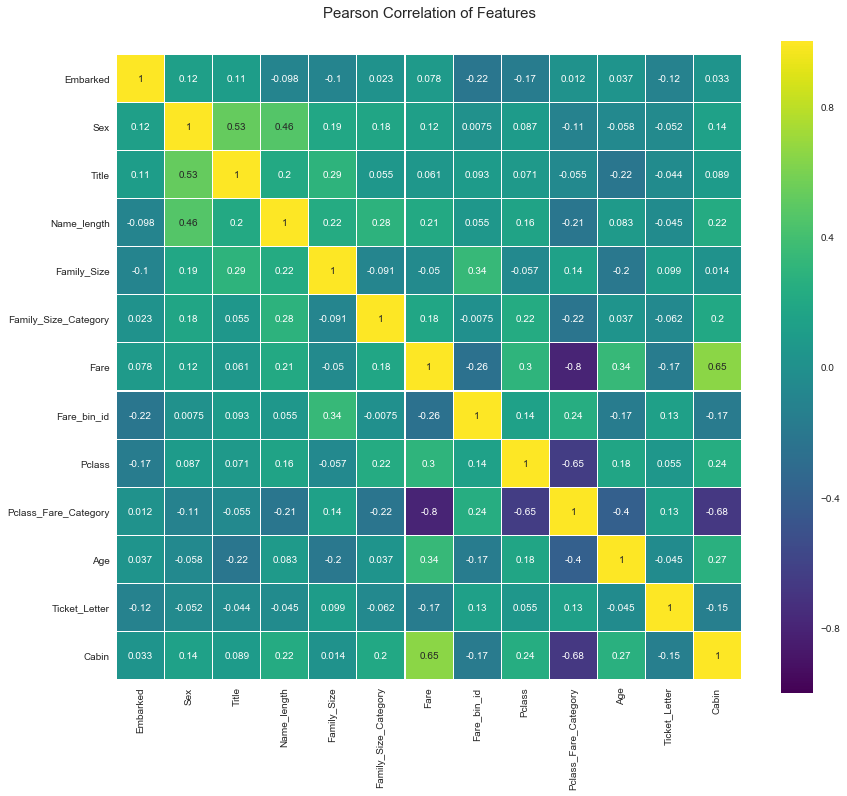

In [26]:
#挑选一些主要的特征，生成特征之间的关联图，查看特征与特征之间的相关性
Correlation = pd.DataFrame(combined_train_test[
 ['Embarked', 'Sex', 'Title', 'Name_length', 'Family_Size', 'Family_Size_Category','Fare', 'Fare_bin_id', 'Pclass', 
  'Pclass_Fare_Category', 'Age', 'Ticket_Letter', 'Cabin']])

colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(Correlation.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [27]:
#输入模型前的一些处理
from sklearn import preprocessing
#1.正则化,变为 -1~1
scale_age_fare = preprocessing.StandardScaler().fit(combined_train_test[['Age','Fare', 'Name_length']])
combined_train_test[['Age','Fare', 'Name_length']] = scale_age_fare.transform(combined_train_test[['Age','Fare', 'Name_length']])

combined_train_test.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Pclass_2,Pclass_3,Pclass_4,Pclass_5,Family_Size,Family_Size_Category,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2,Ticket_Letter
0,-0.613832,0,0,-0.554177,"Braund, Mr. Owen Harris",0,1,0,0,1,...,0,0,0,1,2,2,0,0,1,0
1,0.628562,1,1,1.541869,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,...,0,0,0,0,2,2,0,0,1,1
2,-0.303234,0,0,-0.504344,"Heikkinen, Miss. Laina",0,3,0,1,0,...,0,0,1,0,1,1,0,1,0,2
3,0.395613,1,0,0.870667,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,...,0,0,0,0,2,2,0,0,1,3
4,0.395613,0,0,-0.495116,"Allen, Mr. William Henry",0,5,0,0,0,...,0,0,1,0,1,1,0,1,0,3


In [28]:
#2.丢弃无用特征
combined_data_backup = combined_train_test
combined_train_test.drop(['PassengerId', 'Embarked', 'Sex', 'Name', 'Title', 'Fare_bin_id', 'Pclass_Fare_Category', 
                       'Parch', 'SibSp', 'Family_Size_Category', 'Ticket'],axis=1,inplace=True)

In [29]:
combined_train_test.head()

,Age,Cabin,Fare,Pclass,Survived,Embarked_0,Embarked_1,Embarked_2,Sex_0,Sex_1,...,Pclass_1,Pclass_2,Pclass_3,Pclass_4,Pclass_5,Family_Size,Family_Size_Category_0,Family_Size_Category_1,Family_Size_Category_2,Ticket_Letter
0,-0.613832,0,-0.554177,0,0,1,0,0,1,0,...,0,0,0,0,1,2,0,0,1,0
1,0.628562,1,1.541869,1,1,0,1,0,0,1,...,0,0,0,0,0,2,0,0,1,1
2,-0.303234,0,-0.504344,0,1,1,0,0,0,1,...,0,0,0,1,0,1,0,1,0,2
3,0.395613,1,0.870667,1,1,1,0,0,0,1,...,1,0,0,0,0,2,0,0,1,3
4,0.395613,0,-0.495116,0,0,1,0,0,1,0,...,0,0,0,1,0,1,0,1,0,3


In [30]:
train_data = combined_train_test[:891]
test_data = combined_train_test[891:]

titanic_train_data_X = train_data.drop(['Survived'],axis=1)
titanic_train_data_Y = train_data['Survived']
titanic_test_data_X = test_data.drop(['Survived'],axis=1)


titanic_train_data_X.shape

(891, 32)

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# 利用不同的模型来对特征进行筛选，选出较为重要的特征(重要)
def get_top_n_features(titanic_train_data_X, titanic_train_data_Y, top_n_features):
    # random forest
    rf_est = RandomForestClassifier(random_state=0)
    rf_param_grid = {'n_estimators': [500], 'min_samples_split': [2, 3], 'max_depth': [4,5,6]}
    rf_grid = model_selection.GridSearchCV(rf_est, rf_param_grid, n_jobs=25, cv=10, verbose=1)
    rf_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best RF Params:' + str(rf_grid.best_params_))
    print('Top N Features Best RF Score:' + str(rf_grid.best_score_))
    print('Top N Features RF Train Score:' + str(rf_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_rf = pd.DataFrame({'feature': list(titanic_train_data_X),
                                          'importance': rf_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_rf = feature_imp_sorted_rf.head(top_n_features)['feature']
    print('Sample 10 Features from RF Classifier')
    print(str(features_top_n_rf[:10]))
    
    # AdaBoost
    ada_est =AdaBoostClassifier(random_state=0)
    ada_param_grid = {'n_estimators': [500], 'learning_rate': [0.01, 0.1]}
    ada_grid = model_selection.GridSearchCV(ada_est, ada_param_grid, n_jobs=25, cv=10, verbose=1)
    ada_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best Ada Params:' + str(ada_grid.best_params_))
    print('Top N Features Best Ada Score:' + str(ada_grid.best_score_))
    print('Top N Features Ada Train Score:' + str(ada_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_ada = pd.DataFrame({'feature': list(titanic_train_data_X),
                                           'importance': ada_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_ada = feature_imp_sorted_ada.head(top_n_features)['feature']
    print('Sample 10 Feature from Ada Classifier:')
    print(str(features_top_n_ada[:10]))

    # ExtraTree
    et_est = ExtraTreesClassifier(random_state=0)
    et_param_grid = {'n_estimators': [500], 'min_samples_split': [3, 4], 'max_depth': [6,7,8]}
    et_grid = model_selection.GridSearchCV(et_est, et_param_grid, n_jobs=25, cv=10, verbose=1)
    et_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best ET Params:' + str(et_grid.best_params_))
    print('Top N Features Best ET Score:' + str(et_grid.best_score_))
    print('Top N Features ET Train Score:' + str(et_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_et = pd.DataFrame({'feature': list(titanic_train_data_X),
                                          'importance': et_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_et = feature_imp_sorted_et.head(top_n_features)['feature']
    print('Sample 10 Features from ET Classifier:')
    print(str(features_top_n_et[:10]))
    
    # GradientBoosting
    gb_est =GradientBoostingClassifier(random_state=0)
    gb_param_grid = {'n_estimators': [500], 'learning_rate': [0.01, 0.1], 'max_depth': [4,5,6]}
    gb_grid = model_selection.GridSearchCV(gb_est, gb_param_grid, n_jobs=25, cv=10, verbose=1)
    gb_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best GB Params:' + str(gb_grid.best_params_))
    print('Top N Features Best GB Score:' + str(gb_grid.best_score_))
    print('Top N Features GB Train Score:' + str(gb_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_gb = pd.DataFrame({'feature': list(titanic_train_data_X),
                                           'importance': gb_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_gb = feature_imp_sorted_gb.head(top_n_features)['feature']
    print('Sample 10 Feature from GB Classifier:')
    print(str(features_top_n_gb[:10]))
    
    # DecisionTree
    dt_est = DecisionTreeClassifier(random_state=0)
    dt_param_grid = {'min_samples_split': [2, 4], 'max_depth': [7,8,9]}
    dt_grid = model_selection.GridSearchCV(dt_est, dt_param_grid, n_jobs=25, cv=10, verbose=1)
    dt_grid.fit(titanic_train_data_X, titanic_train_data_Y)
    print('Top N Features Best DT Params:' + str(dt_grid.best_params_))
    print('Top N Features Best DT Score:' + str(dt_grid.best_score_))
    print('Top N Features DT Train Score:' + str(dt_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_dt = pd.DataFrame({'feature': list(titanic_train_data_X),
                                          'importance': dt_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_dt = feature_imp_sorted_dt.head(top_n_features)['feature']
    print('Sample 10 Features from DT Classifier:')
    print(str(features_top_n_dt[:10]))
    #xg
    xg_est = XGBClassifier(random_state = 0)
    xg_param_grid = {'n_estimators': [2000], 'min_child_weight': [2 ,3], 'max_depth': [4]}
    xg_grid = model_selection.GridSearchCV(xg_est,xg_param_grid,n_jobs=25, cv=10, verbose=1)
    xg_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best XG Params:' + str(xg_grid.best_params_))
    print('Top N Features Best XG Score:' + str(xg_grid.best_score_))
    print('Top N Features XG Train Score:' + str(xg_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_xg = pd.DataFrame({'feature': list(titanic_train_data_X),
                                           'importance': xg_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_xg = feature_imp_sorted_xg.head(top_n_features)['feature']
    print('Sample 10 Feature from XG Classifier:')
    print(str(features_top_n_xg[:10]))
    
    # merge the three models
    features_top_n = pd.concat([features_top_n_rf, features_top_n_ada, features_top_n_et, features_top_n_gb, features_top_n_dt,features_top_n_xg], 
                               ignore_index=True).drop_duplicates()
    
    features_importance = pd.concat([feature_imp_sorted_rf, feature_imp_sorted_ada, feature_imp_sorted_et, 
                                   feature_imp_sorted_gb, feature_imp_sorted_dt,feature_imp_sorted_xg],ignore_index=True)
    
    return features_top_n , features_importance

feature_to_pick = 30
feature_top_n, feature_importance = get_top_n_features(titanic_train_data_X, titanic_train_data_Y, feature_to_pick)
titanic_train_data_X = pd.DataFrame(titanic_train_data_X[feature_top_n])
titanic_test_data_X = pd.DataFrame(titanic_test_data_X[feature_top_n])

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=25)]: Done  60 out of  60 | elapsed:  1.4min finished


Top N Features Best RF Params:{'max_depth': 6, 'min_samples_split': 3, 'n_estimators': 500}
Top N Features Best RF Score:0.832772166105
Top N Features RF Train Score:0.877665544332
Sample 10 Features from RF Classifier
0         Title_0
1           Sex_0
2           Sex_1
3            Fare
5     Name_length
6             Age
4          Pclass
7         Title_2
8         Title_1
10    Family_Size
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   36.2s remaining:   19.4s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:   51.0s finished


Top N Features Best Ada Params:{'learning_rate': 0.01, 'n_estimators': 500}
Top N Features Best Ada Score:0.81593714927
Top N Features Ada Train Score:0.820426487093
Sample 10 Feature from Ada Classifier:
0                    Title_0
3                       Fare
10               Family_Size
12    Family_Size_Category_0
1                      Sex_0
4                     Pclass
9                      Cabin
2                      Sex_1
5                Name_length
6                        Age
Name: feature, dtype: object
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=25)]: Done  60 out of  60 | elapsed:  1.3min finished


Top N Features Best ET Params:{'max_depth': 8, 'min_samples_split': 3, 'n_estimators': 500}
Top N Features Best ET Score:0.836139169473
Top N Features ET Train Score:0.897867564534
Sample 10 Features from ET Classifier:
0                    Title_0
2                      Sex_1
1                      Sex_0
7                    Title_2
9                      Cabin
8                    Title_1
4                     Pclass
12    Family_Size_Category_0
11    Family_Size_Category_2
13                    Fare_1
Name: feature, dtype: object
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=25)]: Done  60 out of  60 | elapsed:  1.7min finished


Top N Features Best GB Params:{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}
Top N Features Best GB Score:0.824915824916
Top N Features GB Train Score:0.90684624018
Sample 10 Feature from GB Classifier:
3                       Fare
0                    Title_0
6                        Age
5                Name_length
19             Ticket_Letter
4                     Pclass
10               Family_Size
9                      Cabin
12    Family_Size_Category_0
25                   Title_5
Name: feature, dtype: object
Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=25)]: Done  60 out of  60 | elapsed:   50.8s finished


Top N Features Best DT Params:{'max_depth': 9, 'min_samples_split': 2}
Top N Features Best DT Score:0.809203142536
Top N Features DT Train Score:0.933782267116
Sample 10 Features from DT Classifier:
0                    Title_0
3                       Fare
6                        Age
12    Family_Size_Category_0
5                Name_length
25                   Title_5
14                  Pclass_5
4                     Pclass
19             Ticket_Letter
9                      Cabin
Name: feature, dtype: object
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   48.8s remaining:   26.2s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:  1.1min finished


Top N Features Best XG Params:{'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 2000}
Top N Features Best XG Score:0.808080808081
Top N Features XG Train Score:0.99214365881
Sample 10 Feature from XG Classifier:
6               Age
3              Fare
5       Name_length
19    Ticket_Letter
10      Family_Size
1             Sex_0
4            Pclass
20       Embarked_0
22       Embarked_1
0           Title_0
Name: feature, dtype: object


In [90]:
list(titanic_train_data_X)

['Title_0',
 'Sex_0',
 'Sex_1',
 'Fare',
 'Pclass',
 'Name_length',
 'Age',
 'Title_2',
 'Title_1',
 'Cabin',
 'Family_Size',
 'Family_Size_Category_2',
 'Family_Size_Category_0',
 'Fare_1',
 'Pclass_5',
 'Fare_4',
 'Pclass_4',
 'Pclass_1',
 'Title_3',
 'Ticket_Letter',
 'Embarked_0',
 'Family_Size_Category_1',
 'Embarked_1',
 'Pclass_3',
 'Fare_0',
 'Title_5',
 'Pclass_2',
 'Pclass_0',
 'Fare_3',
 'Embarked_2',
 'Fare_2',
 'Title_4']

In [91]:
feature_top_n

0                    Title_0
1                      Sex_0
2                      Sex_1
3                       Fare
4                     Pclass
5                Name_length
6                        Age
7                    Title_2
8                    Title_1
9                      Cabin
10               Family_Size
11    Family_Size_Category_2
12    Family_Size_Category_0
13                    Fare_1
14                  Pclass_5
15                    Fare_4
16                  Pclass_4
17                  Pclass_1
18                   Title_3
19             Ticket_Letter
20                Embarked_0
21    Family_Size_Category_1
22                Embarked_1
23                  Pclass_3
24                    Fare_0
35                   Title_5
36                  Pclass_2
37                  Pclass_0
39                    Fare_3
40                Embarked_2
42                    Fare_2
90                   Title_4
Name: feature, dtype: object

In [92]:
feature_importance

,feature,importance
0,Title_0,0.151255
1,Sex_0,0.150017
2,Sex_1,0.148214
3,Fare,0.074360
4,Pclass,0.052545
5,Name_length,0.049057
6,Age,0.044179
7,Title_2,0.041151
8,Title_1,0.040728
9,Cabin,0.033258


In [93]:
#选取前10的特征
rf_feature_imp = feature_importance[:10]
Ada_feature_imp = feature_importance[32:32+10].reset_index(drop=True)

# make importances relative to max importance
rf_feature_importance = 100.0 * (rf_feature_imp['importance'] / rf_feature_imp['importance'].max())
Ada_feature_importance = 100.0 * (Ada_feature_imp['importance'] / Ada_feature_imp['importance'].max())

rf_important_idx = np.where(rf_feature_importance)[0]
Ada_important_idx = np.where(Ada_feature_importance)[0]

In [94]:
rf_important_idx
#Ada_important_idx

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [95]:
Ada_important_idx

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

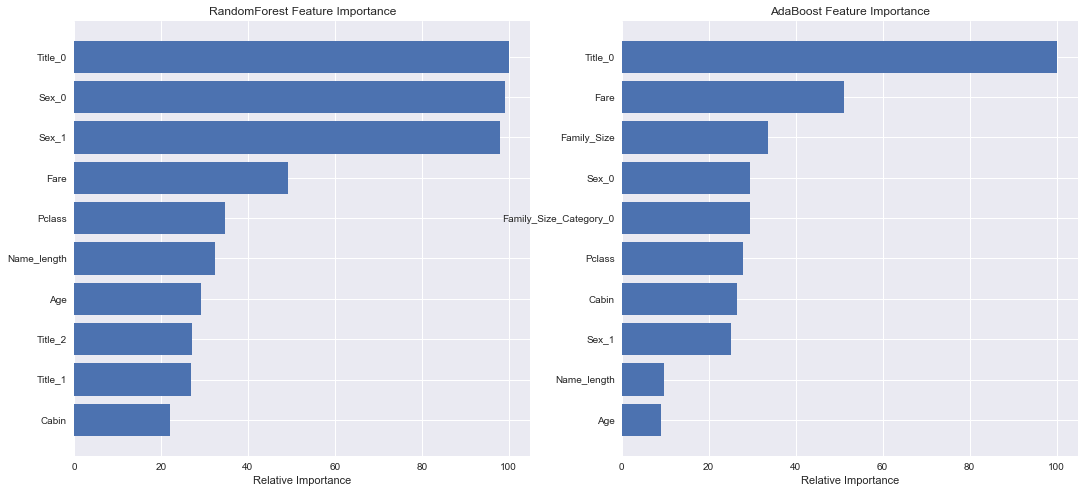

In [96]:
# Adapted from Gradient Boosting regression
pos = np.arange(rf_important_idx.shape[0]) + .5

plt.figure(1, figsize = (18, 8))

plt.subplot(121)
plt.barh(pos, rf_feature_importance[rf_important_idx][::-1])
plt.yticks(pos, rf_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('RandomForest Feature Importance')

plt.subplot(122)
plt.barh(pos, Ada_feature_importance[Ada_important_idx][::-1])
plt.yticks(pos, Ada_feature_imp['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('AdaBoost Feature Importance')

plt.show()

In [39]:
pos

array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5])

In [44]:
from xgboost import XGBClassifier

def get_top_n_features_xg(titanic_train_data_X, titanic_train_data_Y, top_n_features):
    xg_est = XGBClassifier(random_state = 0)
    xg_param_grid = {'n_estimators': [2000], 'min_child_weight': [2 ,3], 'max_depth': [4]}
    xg_grid = model_selection.GridSearchCV(xg_est,xg_param_grid,n_jobs=25, cv=10, verbose=1)
    xg_grid.fit(titanic_train_data_X,titanic_train_data_Y)
    print('Top N Features Best XG Params:' + str(xg_grid.best_params_))
    print('Top N Features Best XG Score:' + str(xg_grid.best_score_))
    print('Top N Features XG Train Score:' + str(xg_grid.score(titanic_train_data_X, titanic_train_data_Y)))
    feature_imp_sorted_xg = pd.DataFrame({'feature': list(titanic_train_data_X),
                                           'importance': xg_grid.best_estimator_.feature_importances_}).sort_values('importance', ascending=False)
    features_top_n_xg = feature_imp_sorted_xg.head(top_n_features)['feature']
    print('Sample 10 Feature from XG Classifier:')
    print(str(features_top_n_xg[:10]))
        
    return features_top_n_xg ,feature_imp_sorted_xg

features_top_n_xg, feature_imp_sorted_xg = get_top_n_features_xg(titanic_train_data_X, titanic_train_data_Y, 30)


Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=25)]: Done  13 out of  20 | elapsed:   49.9s remaining:   26.8s
[Parallel(n_jobs=25)]: Done  20 out of  20 | elapsed:  1.1min finished


Top N Features Best XG Params:{'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 2000}
Top N Features Best XG Score:0.808080808081
Top N Features XG Train Score:0.99214365881
Sample 10 Feature from XG Classifier:
1               Age
2              Fare
0       Name_length
8     Ticket_Letter
6       Family_Size
3             Sex_0
7            Pclass
14       Embarked_0
20       Embarked_1
4           Title_0
Name: feature, dtype: object


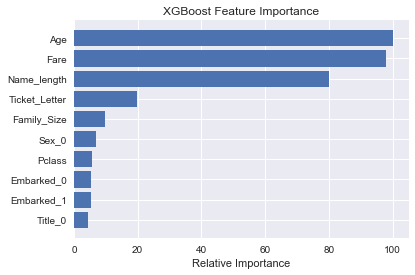

In [63]:
feature_importance = pd.concat([feature_importance,feature_imp_sorted_xg],ignore_index=True)
feature_imp_sorted_xg1 = feature_importance[160:170].reset_index(drop=True)
xg_feature_importance = 100.0 * (feature_imp_sorted_xg1['importance'] / feature_imp_sorted_xg1['importance'].max())
xg_importance_idx = np.where(xg_feature_importance)[0]

pos = np.arange(xg_importance_idx.shape[0]) + .5

plt.barh(pos, xg_feature_importance[xg_importance_idx][::-1])#plt.barh(idx, x, color=color)
plt.yticks(pos, feature_imp_sorted_xg1['feature'][::-1])
plt.xlabel('Relative Importance')
plt.title('XGBoost Feature Importance')

plt.show()



In [47]:
xg_feature_importance

1     100.000000
2      97.899284
0      80.057564
8      19.625900
6       9.755396
3       6.848921
7       5.553957
14      5.467626
20      5.266187
4       4.517986
Name: importance, dtype: float32

In [51]:
feature_imp_sorted_xg1

,feature,importance
1,Age,0.273665
2,Fare,0.267916
0,Name_length,0.219090
8,Ticket_Letter,0.053709
6,Family_Size,0.026697
3,Sex_0,0.018743
7,Pclass,0.015199
14,Embarked_0,0.014963
20,Embarked_1,0.014412
4,Title_0,0.012364


In [52]:
xg_importance_idx

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [55]:
xg_feature_importance[xg_importance_idx][: : -1]

9           NaN
8     19.625900
7      5.553957
6      9.755396
5           NaN
4      4.517986
3      6.848921
2     97.899284
1    100.000000
0     80.057564
Name: importance, dtype: float32

In [56]:
xg_feature_importance[xg_importance_idx]

0     80.057564
1    100.000000
2     97.899284
3      6.848921
4      4.517986
5           NaN
6      9.755396
7      5.553957
8     19.625900
9           NaN
Name: importance, dtype: float32

In [59]:
xg_feature_importance

1     100.000000
2      97.899284
0      80.057564
8      19.625900
6       9.755396
3       6.848921
7       5.553957
14      5.467626
20      5.266187
4       4.517986
Name: importance, dtype: float32

In [97]:
#模型融合 Stacking框架融合
# Stacking是用新的次学习器去学习如何组合上一层的基学习器。如果把 Bagging 看作是多个基分类器的线性组合，
# 那么Stacking就是多个基分类器的非线性组合。Stacking可以将学习器一层一层地堆砌起来，形成一个网状的结构

#Level1 RandomForest、AdaBoost、ExtraTrees、GBDT、DecisionTree、KNN、SVM ，一共7个模型
from sklearn.model_selection import KFold

#对每个基学习器使用K-fold，将K个模型对Valid Set的预测结果拼起来，作为下一层学习器的输入 防止标签泄露
ntrain = titanic_train_data_X.shape[0]
ntest = titanic_test_data_X.shape[0]
SEED = 0
NFOLDS = 7
kf = KFold(n_splits = NFOLDS,random_state = SEED,shuffle=False)

def get_out_fold(clf,x_train,y_train,x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS,ntest))
    
    for i , (train_index,test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        
        clf.fit(x_tr,y_tr)
        
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i,:] = clf.predict(x_test)
        
    oof_test[:] = oof_test_skf.mean(axis = 0)
    return oof_train.reshape(-1,1),oof_test.reshape(-1,1)

titanic_train_data_X.head()


,Title_0,Sex_0,Sex_1,Fare,Pclass,Name_length,Age,Title_2,Title_1,Cabin,...,Embarked_1,Pclass_3,Fare_0,Title_5,Pclass_2,Pclass_0,Fare_3,Embarked_2,Fare_2,Title_4
0,1,1,0,-0.554177,0,-0.434672,-0.613832,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,1.541869,1,2.511806,0.628562,0,1,1,...,1,0,0,0,0,1,0,0,0,0
2,0,0,1,-0.504344,0,-0.539904,-0.303234,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0.870667,1,1.775186,0.395613,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,-0.495116,0,-0.329441,0.395613,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [102]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

rf = RandomForestClassifier(n_estimators=500, warm_start=True, max_features='sqrt',max_depth=6, 
                            min_samples_split=3, min_samples_leaf=2, n_jobs=-1, verbose=0)

ada = AdaBoostClassifier(n_estimators=500, learning_rate=0.01)

et = ExtraTreesClassifier(n_estimators=500, n_jobs=-1, max_depth=8, min_samples_leaf=2, verbose=0)

gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.008, min_samples_split=3, min_samples_leaf=2, max_depth=5, verbose=0)

dt = DecisionTreeClassifier(max_depth=7)

knn = KNeighborsClassifier(n_neighbors = 2)

svm = SVC(kernel='linear', C=0.025,probability=True)

#将pandas转换为arrays
x_train = titanic_train_data_X.values # Creates an array of the train data
x_test = titanic_test_data_X.values # Creats an array of the test data
y_train = titanic_train_data_Y.values

# Create our OOF train and test predictions. These base results will be used as new features
rf_oof_train, rf_oof_test = get_out_fold(rf, x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_out_fold(ada, x_train, y_train, x_test) # AdaBoost 
et_oof_train, et_oof_test = get_out_fold(et, x_train, y_train, x_test) # Extra Trees
gb_oof_train, gb_oof_test = get_out_fold(gb, x_train, y_train, x_test) # Gradient Boost
dt_oof_train, dt_oof_test = get_out_fold(dt, x_train, y_train, x_test) # Decision Tree
knn_oof_train, knn_oof_test = get_out_fold(knn, x_train, y_train, x_test) # KNeighbors
svm_oof_train, svm_oof_test = get_out_fold(svm, x_train, y_train, x_test) # Support Vector

print("Training is complete")


Training is complete


In [99]:
x_train = np.concatenate((rf_oof_train, ada_oof_train, et_oof_train, gb_oof_train, dt_oof_train, knn_oof_train, svm_oof_train), axis=1)
x_test = np.concatenate((rf_oof_test, ada_oof_test, et_oof_test, gb_oof_test, dt_oof_test, knn_oof_test, svm_oof_test), axis=1)

from xgboost import XGBClassifier

gbm = XGBClassifier( n_estimators= 2000, max_depth= 4, min_child_weight= 2, gamma=0.9, subsample=0.8, 
                     colsample_bytree=0.8, objective= 'binary:logistic', nthread= -1, scale_pos_weight=1).fit(x_train, y_train)
predictions = gbm.predict(x_test)

StackingSubmission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': predictions})
StackingSubmission.to_csv('StackingSubmission2.csv',index=False,sep=',')
print(x_train.shape)
print(x_test.shape)

(891, 7)
(418, 7)


In [105]:
voting_est = ensemble.VotingClassifier(estimators = [('rf', rf),('ada',ada),('et',et),('gb', gb),('dt',dt),('knn',knn),('svm',svm),('gbm',gbm)],
                                       voting = 'soft', weights = [1,1,1,2,2,1,1,3],
                                       n_jobs = 50)
voting_est.fit(titanic_train_data_X,titanic_train_data_Y)
predictions = voting_est.predict(titanic_test_data_X)

StackingSubmission = pd.DataFrame({'PassengerId': PassengerId, 'Survived': predictions})
StackingSubmission.to_csv('StackingSubmission4.csv',index=False,sep=',')

In [80]:
rf_oof_train.shape

(891, 1)

In [81]:
rf_oof_test.shape

(418, 1)